In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from pandas.plotting import scatter_matrix
# Librerías para distintos coeficientes de correlación
from scipy.stats import spearmanr
from scipy.stats import kendalltau
from sklearn.preprocessing import StandardScaler
from scipy.stats import boxcox

# Librerias propias
import obtenerDatos as oD
import conexionSGBD as cS
import util as ut
import modelos as mod
import os
from datetime import datetime, timedelta
os.chdir('D:\\Plagas')
#%matplotlib inline

Obtenemos el modelo de datos que hemos almacenado en base de datos.

In [2]:
df=cS.getTodoModelo()

Sacamos los histogramas para todas sus columnas.

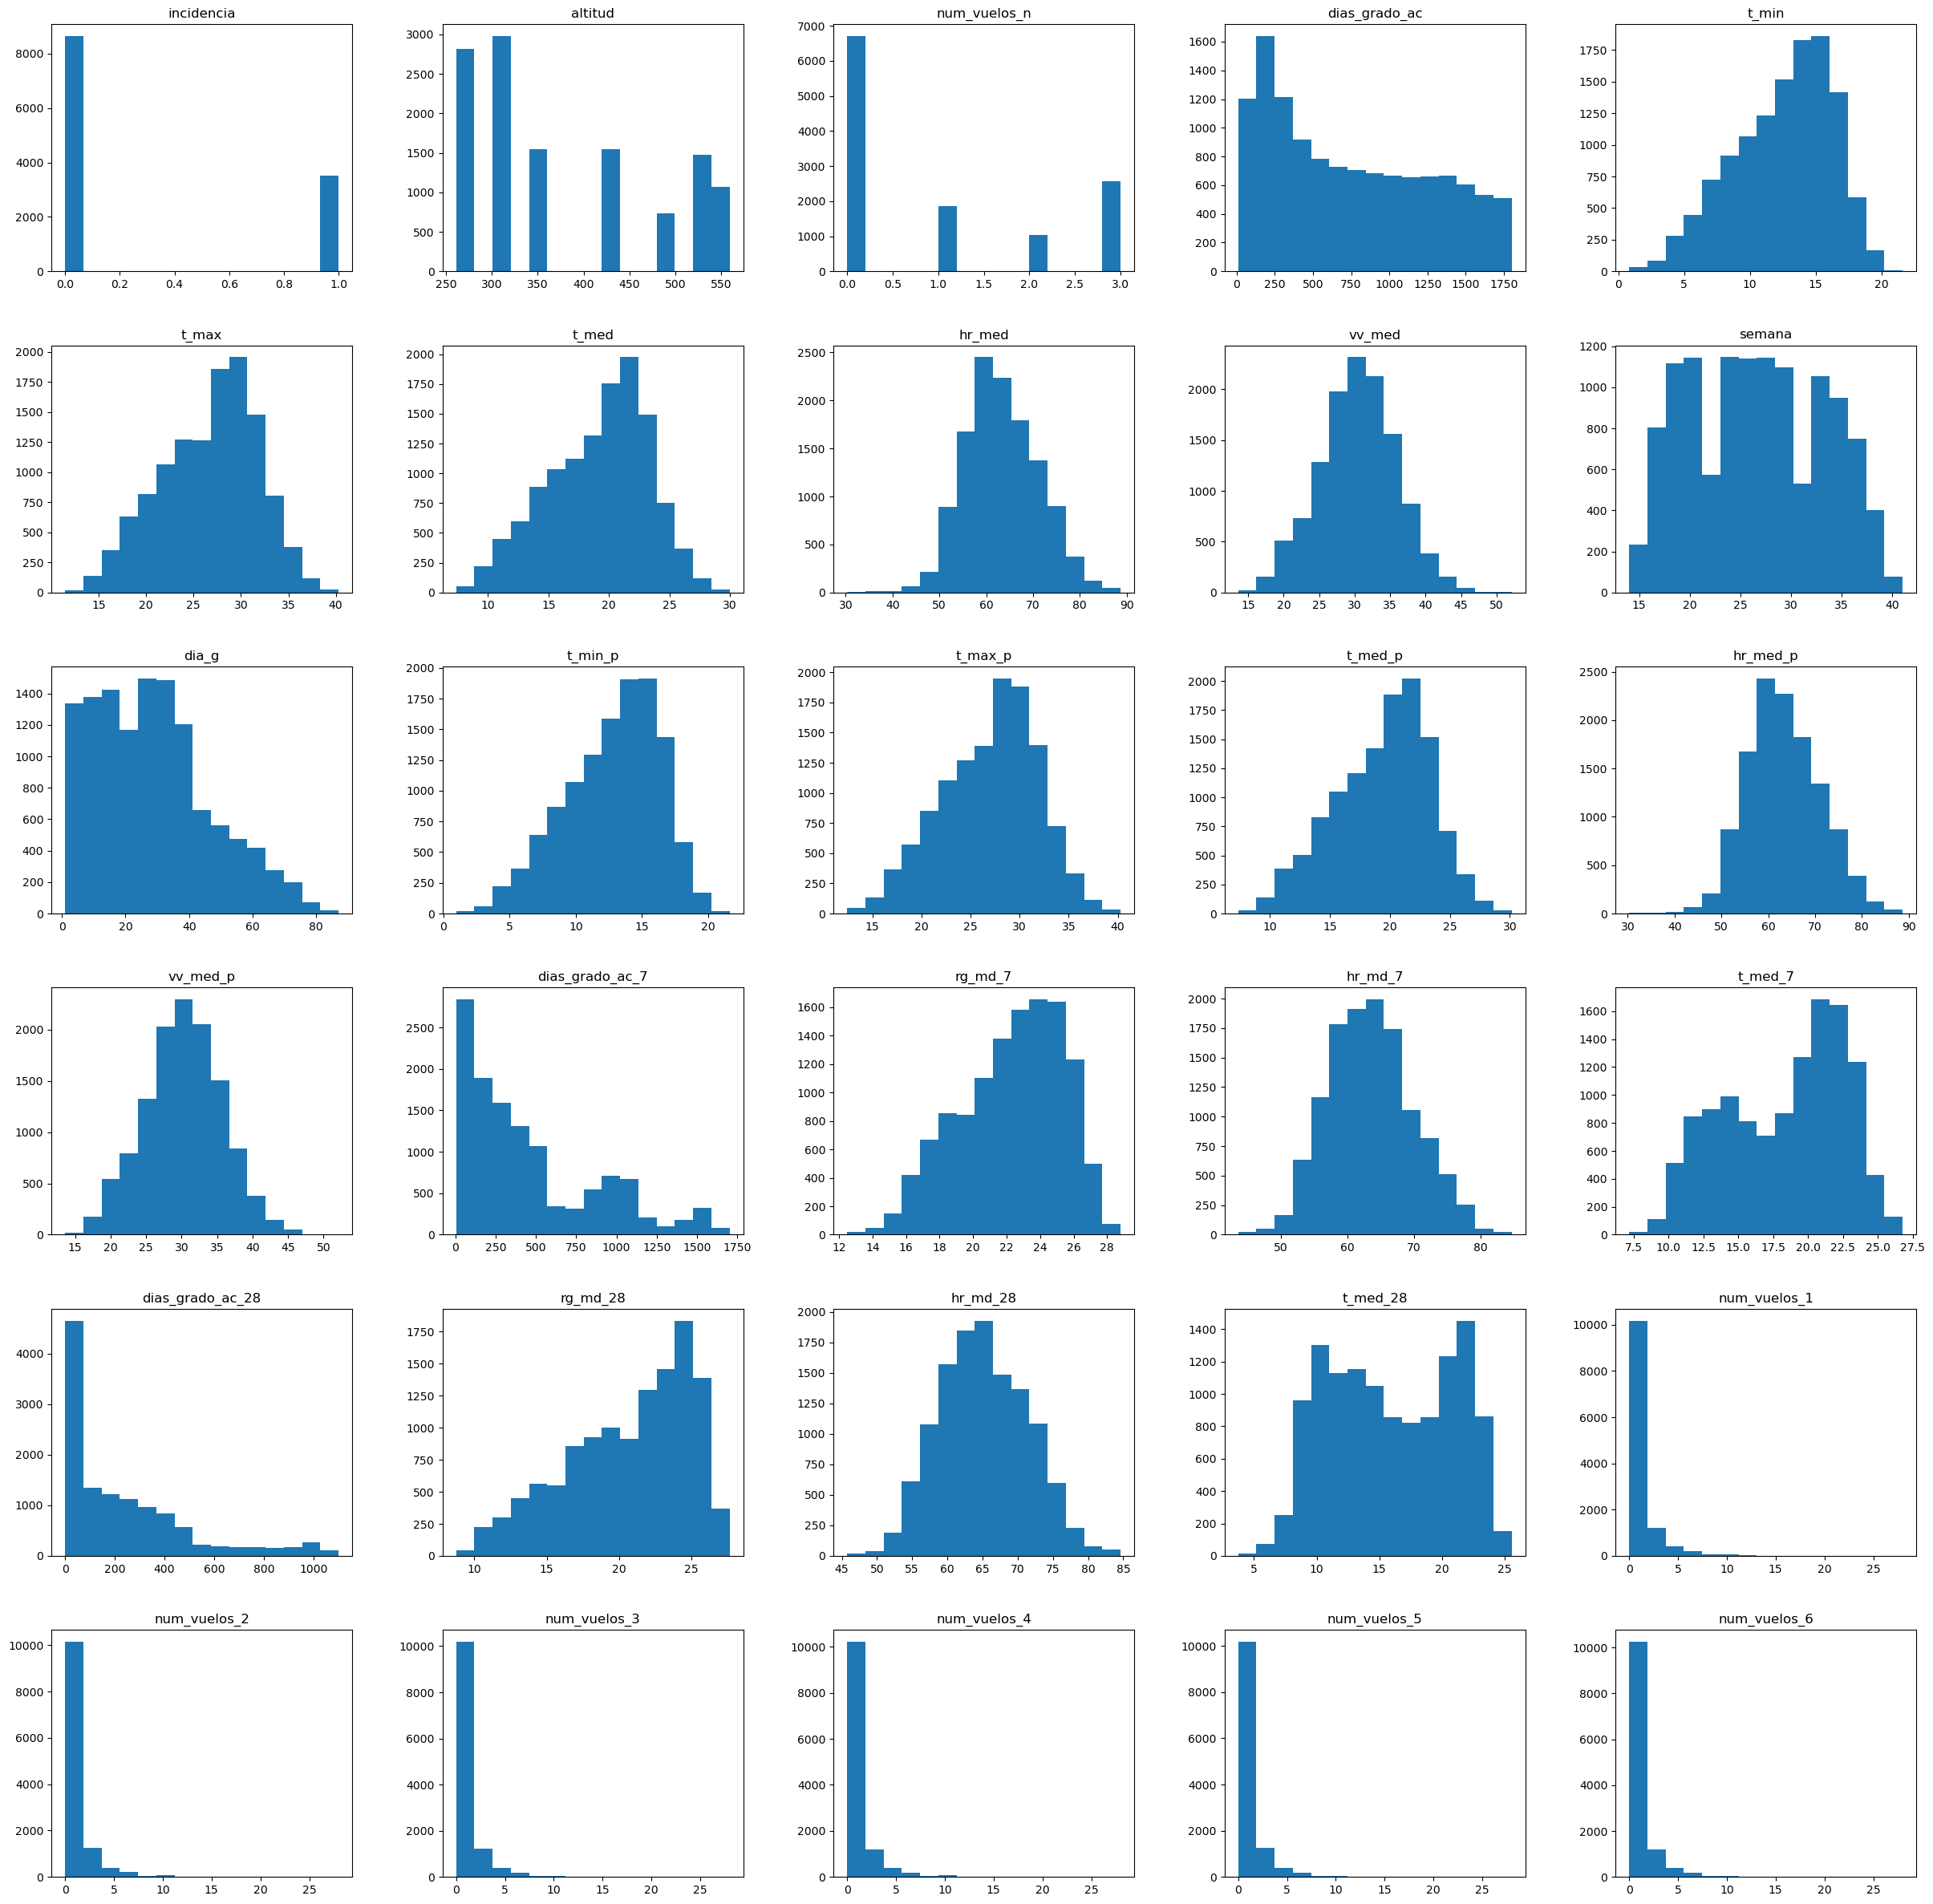

In [3]:
# Crear histogramas para todas las columnas numéricas
df[['incidencia', 'altitud','num_vuelos_n','dias_grado_ac','t_min','t_max','t_med','hr_med','vv_med', \
                         'semana','dia_g','t_min_p','t_max_p','t_med_p','hr_med_p','vv_med_p', \
                         'dias_grado_ac_7','rg_md_7', 'hr_md_7','t_med_7',\
                         'dias_grado_ac_28','rg_md_28', 'hr_md_28','t_med_28',\
                         'num_vuelos_1','num_vuelos_2','num_vuelos_3','num_vuelos_4','num_vuelos_5','num_vuelos_6']].hist(bins=15, figsize=(30, 30), grid=False)

plt.show()

Obtenemos la matriz de correlación con todas las columnas del dataset. A valorar la correlación de incidencia y num_vuelos_n con el resto.

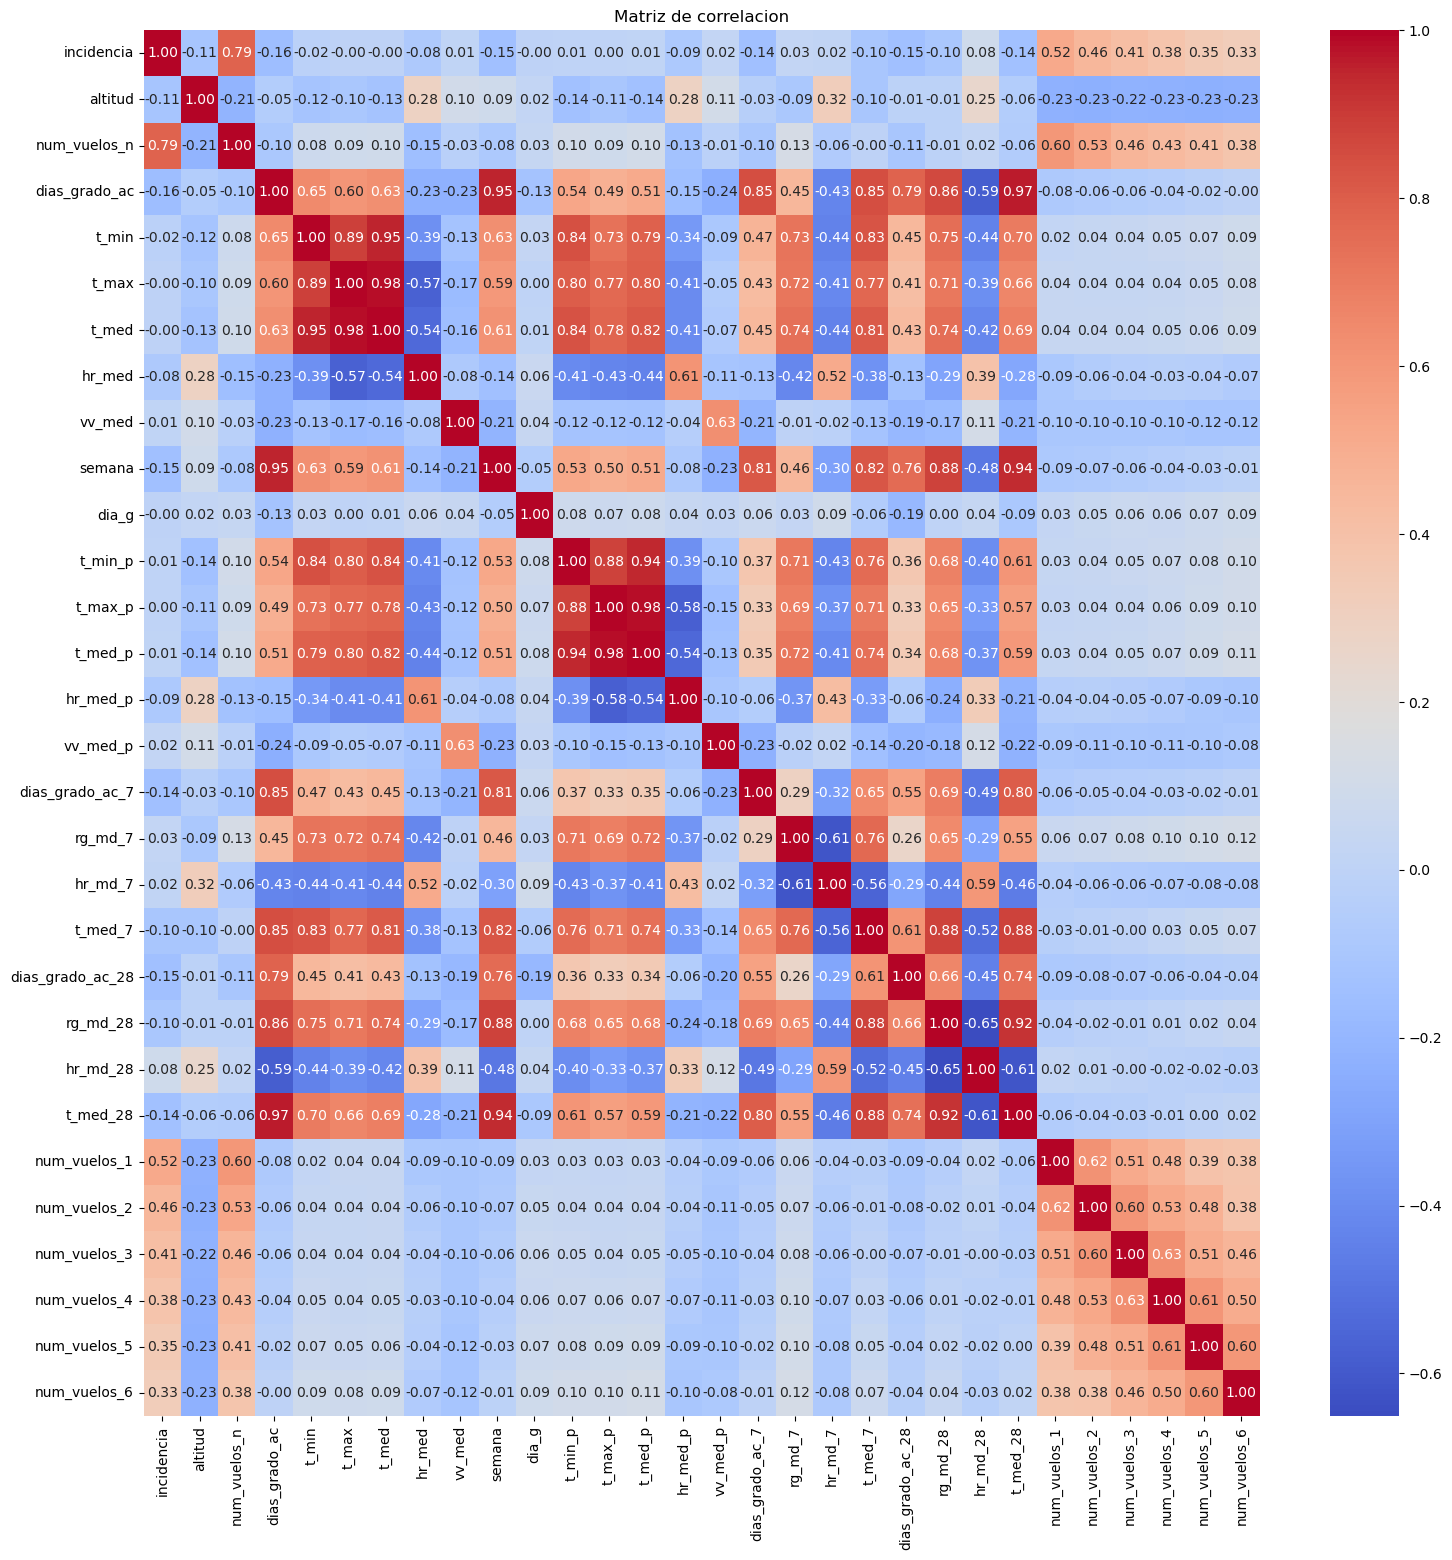

In [4]:
df_corr_matrix = df[['incidencia', 'altitud','num_vuelos_n','dias_grado_ac','t_min','t_max','t_med','hr_med','vv_med', \
                         'semana','dia_g','t_min_p','t_max_p','t_med_p','hr_med_p','vv_med_p', \
                         'dias_grado_ac_7','rg_md_7', 'hr_md_7','t_med_7',\
                         'dias_grado_ac_28','rg_md_28', 'hr_md_28','t_med_28',\
                         'num_vuelos_1','num_vuelos_2','num_vuelos_3','num_vuelos_4','num_vuelos_5','num_vuelos_6']]

corr_matrix = df_corr_matrix.corr()
plt.figure(figsize=(18,18))
sb.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt = ".2f")
plt.title("Matriz de correlacion")
plt.show()

Hacemos lo propio solo para variables climáticas.

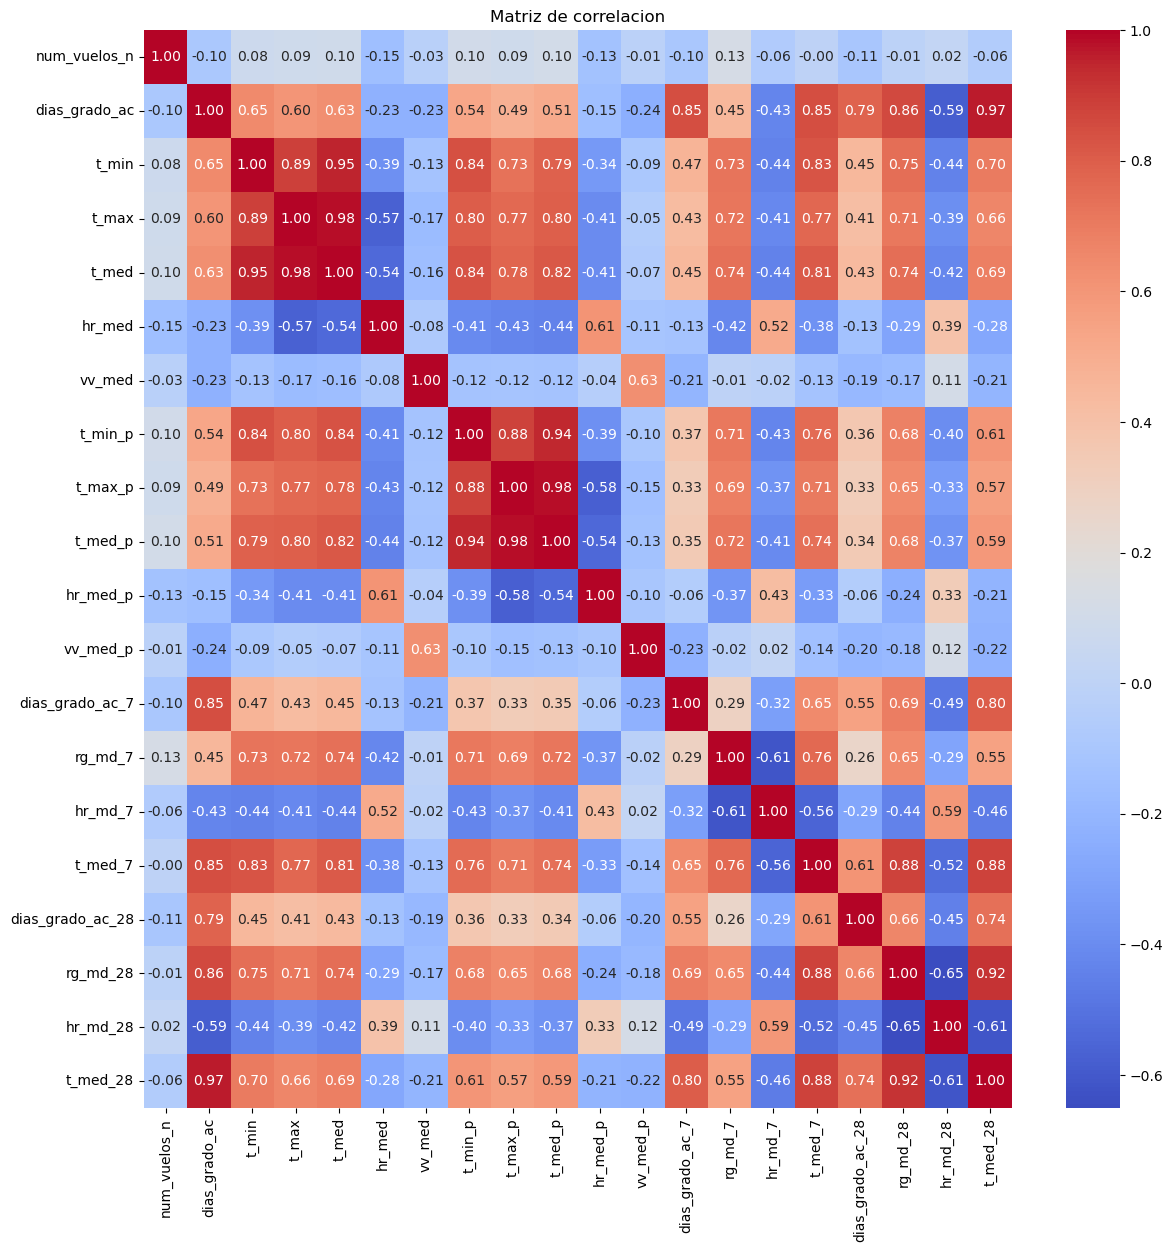

In [5]:
df_corr_matrix = df[['num_vuelos_n', 'dias_grado_ac','t_min','t_max','t_med','hr_med','vv_med',\
                         't_min_p','t_max_p','t_med_p','hr_med_p','vv_med_p',
                         'dias_grado_ac_7','rg_md_7', 'hr_md_7','t_med_7',\
                         'dias_grado_ac_28','rg_md_28', 'hr_md_28','t_med_28']]

corr_matrix = df_corr_matrix.corr()
plt.figure(figsize=(14,14))
sb.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt = ".2f")
plt.title("Matriz de correlacion")
plt.show()

Para ver si hay alguna correlación no lineal obtenemos la correlación con el Métedo de Spearman

In [6]:
matriz_correlacion = df.corr(method="spearman")
corr_incidencia = matriz_correlacion["incidencia"]
corr_incidencia_ordenada = corr_incidencia.abs().sort_values(ascending=False)

# Mostrar las n variables más correlacionadas (ajusta n según necesites)
n = 50
top_corr_features = corr_incidencia_ordenada.head(n)
print(top_corr_features)

incidencia          1.000000
num_vuelos_n        0.728848
num_vuelos_1        0.599609
num_vuelos_2        0.506792
num_vuelos_3        0.434612
num_vuelos_4        0.386079
num_vuelos_5        0.346162
num_vuelos_6        0.315183
fecha               0.177055
anyo                0.166637
generacion          0.156875
semana              0.144691
dias_grado_ac       0.139691
t_med_28            0.137484
altitud             0.134454
rg_md_28            0.128033
dias_grado_ac_7     0.125587
dias_grado_ac_28    0.122588
t_med_7             0.110280
idMunicipio         0.098264
hr_med_p            0.094954
hr_md_28            0.086452
hr_med              0.082296
t_min               0.030758
vv_med_p            0.028519
t_max               0.015522
t_med               0.014487
vv_med              0.013568
rg_md_7             0.012716
hr_md_7             0.012364
t_min_p             0.011910
t_max_p             0.007542
dia_g               0.004583
t_med_p             0.002020
Name: incidenc

In [7]:
# Lista de variables para el eje Y
variables_y = [ 'semana','dia_g','altitud','dias_grado_ac','t_min','t_max','t_med','hr_med','vv_med', \
                         't_min_p','t_max_p','t_med_p','hr_med_p','vv_med_p', \
                         'dias_grado_ac_7','rg_md_7', 'hr_md_7','t_med_7',\
                         'dias_grado_ac_28','rg_md_28', 'hr_md_28','t_med_28',\
                         'num_vuelos_1','num_vuelos_2','num_vuelos_3','num_vuelos_4','num_vuelos_5','num_vuelos_6']

Procedemos a hacer un análisis visual mediante gráficos de violines, que nos permite ver la densidad para cada clase según las columnas especificadas.

Comenzamos con las temperaturas previstas, de la semana pasada, de la semana -2 y -3 y de los dos meses anteriores al actual.

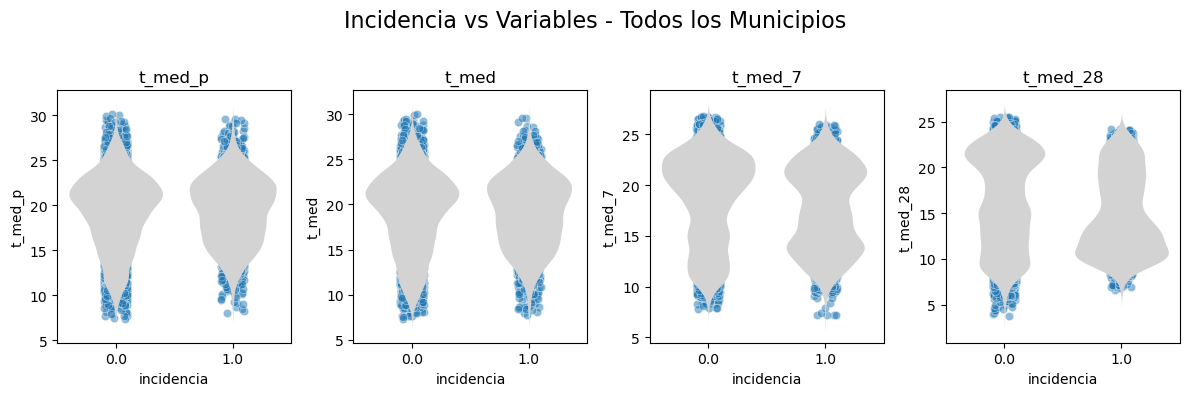

In [8]:
# Crear figura con subgráficos
# Creamos figuras para las temperaturas
variables_y=['t_med_p','t_med','t_med_7','t_med_28']
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))
fig.suptitle('Incidencia vs Variables - Todos los Municipios', fontsize=16)

for ax, var in zip(axes.flatten(), variables_y):
    # Añadir jittering para evitar solapamiento
    x_jitter = df['incidencia'] + np.random.uniform(-0.1, 0.1, size=len(df))
    sb.scatterplot(x=x_jitter, y=df[var], alpha=0.5, ax=ax)

    # Superponer un violin plot en gris para ver la distribución
    sb.violinplot(x=df['incidencia'], y=df[var], ax=ax, inner=None, color="lightgray", linewidth=0)

    ax.set_title(var)
    ax.set_xlabel("incidencia")
    ax.set_ylabel(var)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Seguimos con los días grado acumulados desde comienzo de año, los de las semanas -2 y -3 y de los dos meses anteriores al actual.

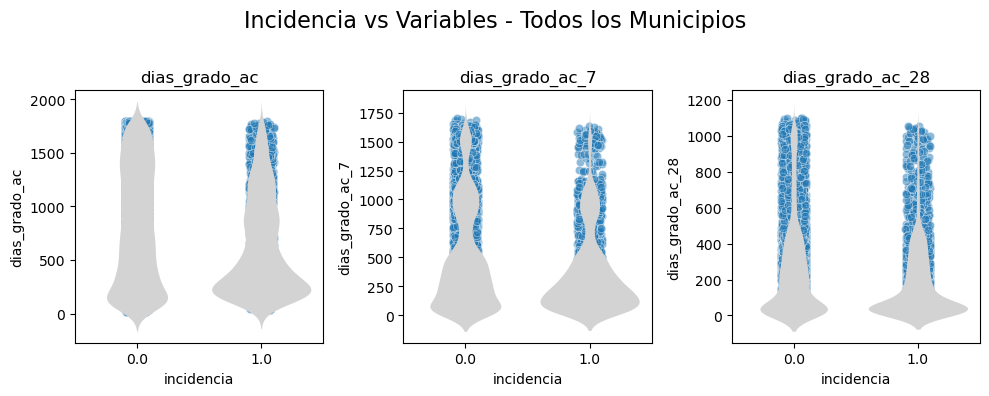

In [9]:
# Crear figura con subgráficos
# Creamos figuras para las días grado
variables_y=['dias_grado_ac','dias_grado_ac_7','dias_grado_ac_28']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))
fig.suptitle('Incidencia vs Variables - Todos los Municipios', fontsize=16)

for ax, var in zip(axes.flatten(), variables_y):
    # Añadir jittering para evitar solapamiento
    x_jitter = df['incidencia'] + np.random.uniform(-0.1, 0.1, size=len(df))
    sb.scatterplot(x=x_jitter, y=df[var], alpha=0.5, ax=ax)

    # Superponer un violin plot en gris para ver la distribución
    sb.violinplot(x=df['incidencia'], y=df[var], ax=ax, inner=None, color="lightgray", linewidth=0)

    ax.set_title(var)
    ax.set_xlabel("incidencia")
    ax.set_ylabel(var)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Seguimos con las humedades relativas previstas, de la semana pasada, de las semanas -2 y -3 y de los dos meses anteriores al actual.

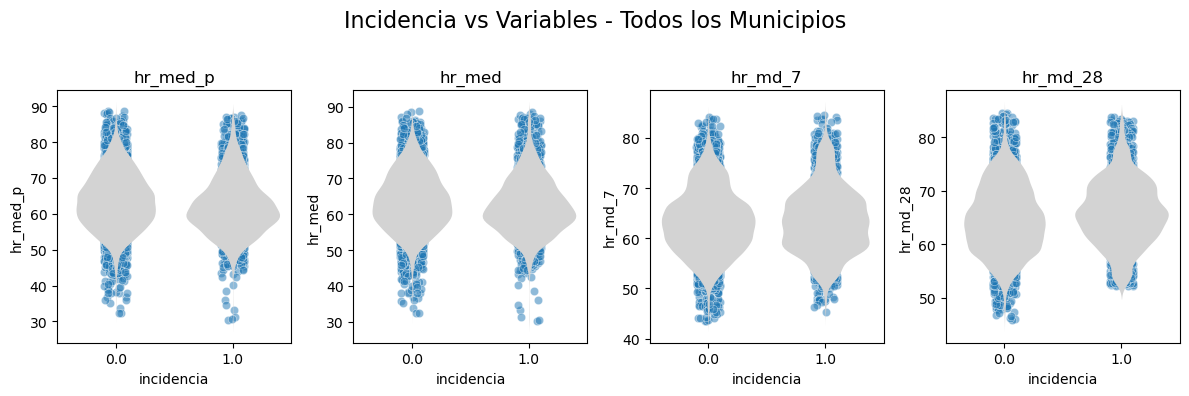

In [10]:
# Crear figura con subgráficos
# Creamos figuras para la humedad relativa
variables_y=['hr_med_p','hr_med','hr_md_7','hr_md_28']
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))
fig.suptitle('Incidencia vs Variables - Todos los Municipios', fontsize=16)

for ax, var in zip(axes.flatten(), variables_y):
    # Añadir jittering para evitar solapamiento
    x_jitter = df['incidencia'] + np.random.uniform(-0.1, 0.1, size=len(df))
    sb.scatterplot(x=x_jitter, y=df[var], alpha=0.5, ax=ax)

    # Superponer un violin plot en gris para ver la distribución
    sb.violinplot(x=df['incidencia'], y=df[var], ax=ax, inner=None, color="lightgray", linewidth=0)

    ax.set_title(var)
    ax.set_xlabel("incidencia")
    ax.set_ylabel(var)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Vemos la velocidad media prevista para la semana entrante y la inmediata inferior.

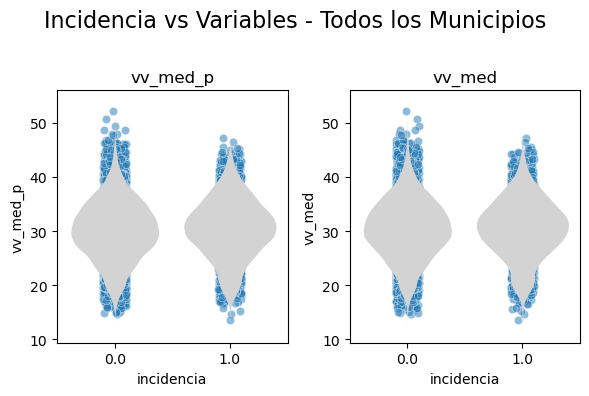

In [11]:
# Crear figura con subgráficos
# Creamos figuras para las temperaturas
variables_y=['vv_med_p','vv_med']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 4))
fig.suptitle('Incidencia vs Variables - Todos los Municipios', fontsize=16)

for ax, var in zip(axes.flatten(), variables_y):
    # Añadir jittering para evitar solapamiento
    x_jitter = df['incidencia'] + np.random.uniform(-0.1, 0.1, size=len(df))
    sb.scatterplot(x=x_jitter, y=df[var], alpha=0.5, ax=ax)

    # Superponer un violin plot en gris para ver la distribución
    sb.violinplot(x=df['incidencia'], y=df[var], ax=ax, inner=None, color="lightgray", linewidth=0)

    ax.set_title(var)
    ax.set_xlabel("incidencia")
    ax.set_ylabel(var)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Terminamos con la radiación acumulada de los 15 días anteriores a la semana pasada y los dos meses anteriores al actual.

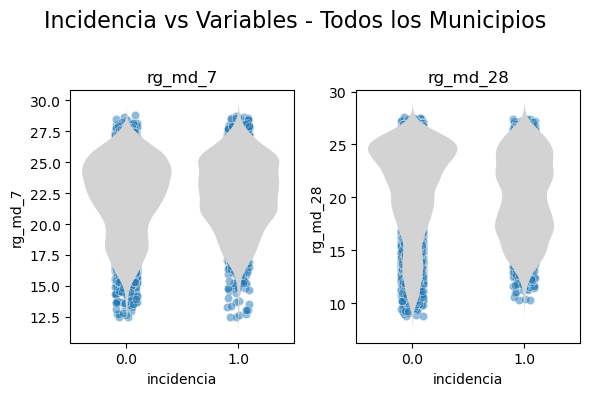

In [12]:
# Crear figura con subgráficos
# Creamos figuras para las temperaturas
variables_y=['rg_md_7','rg_md_28']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 4))
fig.suptitle('Incidencia vs Variables - Todos los Municipios', fontsize=16)

for ax, var in zip(axes.flatten(), variables_y):
    # Añadir jittering para evitar solapamiento
    x_jitter = df['incidencia'] + np.random.uniform(-0.1, 0.1, size=len(df))
    sb.scatterplot(x=x_jitter, y=df[var], alpha=0.5, ax=ax)

    # Superponer un violin plot en gris para ver la distribución
    sb.violinplot(x=df['incidencia'], y=df[var], ax=ax, inner=None, color="lightgray", linewidth=0)

    ax.set_title(var)
    ax.set_xlabel("incidencia")
    ax.set_ylabel(var)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()